In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### Create graphs to explore what happened ####
'''
1. An histogram with the percentage idenntity of the alignments
'''

In [2]:
### Libraries ###
import sys
import matplotlib.pyplot as plt
import os

In [3]:
# Get the percentage identity of the alignments
pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/03_IroN_BLAST_results'
blastFiles = os.listdir(pathDir)

# Create a list with the percentage identity of the alignments
percentageIdentity = []
for blastFile in blastFiles:
    with open(pathDir + '/' + blastFile, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            else:
                line = line.split('\t')
                percentageIdentity.append(float(line[2]))
print(percentageIdentity[0:10])

[80.132, 80.122, 80.122, 80.075, 80.075, 80.038, 80.028, 80.028, 80.028, 79.991]


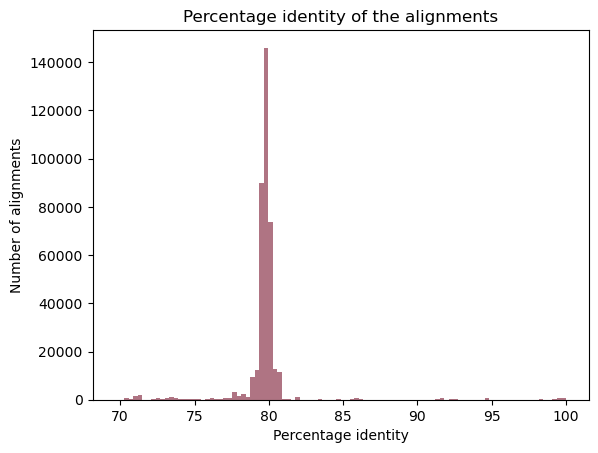

In [4]:
# Make the histogram
plt.hist(percentageIdentity, bins=100, color='#8E394E', alpha=0.7)
plt.xlabel('Percentage identity')
plt.ylabel('Number of alignments')
plt.title('Percentage identity of the alignments')
plt.show()

In [5]:
print(min(percentageIdentity))
print(max(percentageIdentity))

69.652
100.0
